<a href="https://colab.research.google.com/github/tap-o-chek/Neurons_labs/blob/develop/Neuron_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Выполнила: Жиделёва София 
## Группа: БИВТ-20-4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

# Задача 1 -- Реализовать слой с функцией активации "сигмоида"

In [2]:
class SigmoidLayer():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy()
        output = 1 / (1 + np.exp(-X))
        return output
    
    def backward(self, dout):
        sigmoid = 1 / (1 + np.exp(-self.X))
        self.gradInput = dout * (sigmoid * (1 - sigmoid))
        return self.gradInput, []

In [3]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
sigmoid = SigmoidLayer()
output = sigmoid.forward(X)
correct_answer = np.array([[0.57313782, 0.62961995, 0.54773438],
                           [0.51696857, 0.68718368, 0.65843628],
                           [0.65419284, 0.64005501, 0.50976449],
                           [0.58851107, 0.7202462 , 0.51500666],
                           [0.70350447, 0.70626044, 0.51279562]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(sigmoid, "params"), "Нет параметра params в реализованном классе"
assert hasattr(sigmoid, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(sigmoid, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = sigmoid.backward(dout)
correct_dInput = np.array([[0.19460589, 0.20407074, 0.17488009],
                           [0.1656316 , 0.10298473, 0.08073351],
                           [0.21590141, 0.1403435 , 0.21416212],
                           [0.21320927, 0.03610846, 0.05416308],
                           [0.00737656, 0.03121984, 0.02882668]])
assert np.isclose(dInput[:5], correct_dInput).all()

# Задача 2 -- Реализовать слой с активацией гиперболического тангенса

In [4]:
class TanhLayer():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy()
        output = (np.exp(X) - np.exp(-1 * X)) / (np.exp(X) + np.exp(-1 * X))
        return output
    
    def backward(self, dout):
        tanh = (np.exp(X) - np.exp(-1 * X)) / (np.exp(X) + np.exp(-1 * X))
        self.gradInput = dout * (1 - tanh**2)
        return self.gradInput, []

In [5]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
tanh = TanhLayer()
output = tanh.forward(X)
correct_answer = np.array([[0.28642281, 0.48582948, 0.18921297],
                           [0.0677962 , 0.65669792, 0.57591821],
                           [0.5632092 , 0.51946218, 0.03904306],
                           [0.34328675, 0.73782249, 0.05997262],
                           [0.69833441, 0.70505935, 0.05114899]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(tanh, "params"), "Нет параметра params в реализованном классе"
assert hasattr(tanh, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(tanh, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = tanh.backward(dout)
correct_dInput = np.array([[0.7301867 , 0.66854527, 0.68068037],
                           [0.66024164, 0.27247731, 0.23991181],
                           [0.65163784, 0.44479135, 0.85566899],
                           [0.77667226, 0.08164937, 0.21606773],
                           [0.01811832, 0.07567937, 0.11508041]])
assert np.isclose(dInput[:5], correct_dInput).all()

# Задача 3 -- Реализовать функцию потерь MSE

In [99]:
class MSELoss():
    def forward(self, y_true, y_pred):
        n = len(y_true)
        output = (1 / n) * np.sum((y_true - y_pred)**2)
        return output
    
    def backward(self, y_true, y_pred):
        n = len(y_pred)
        grad = 2 * (y_pred - y_true) / n      
        return grad

In [7]:
np.random.seed(17)

y_true = np.random.randint(0, 1000, size=(100))
y_pred = np.random.randint(0, 1000, size=(100))
mse = MSELoss()
output = mse.forward(y_true, y_pred)
correct_answer = 157953.51
assert round(output) == round(correct_answer)

dout = mse.backward(y_true, y_pred)
right_dout = np.array([3.56, 1.24, 10.2, 7.68, 3.02, 9.04, -12.84, -2.16, 3.04, 0.24])
assert np.isclose(dout[:10], right_dout).all()
assert round(dout.sum(), 3) == 19.26

# Задача 4 -- Реализовать каркас нейросети

In [8]:
class LinearLayer:
    """
    Линейный слой с семинаров, ничего менять не надо
    """
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.params = [self.W]
        self.gradW = None
        self.gradInput = None
        
    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W)
        return output
    
    def backward(self, dout):
        self.gradW = self.X.T.dot(dout)
        self.gradInput = dout.dot(self.W.T)
        return self.gradInput, [self.gradW]


class NN:
    def __init__(self, loss_func):
        self.layers = []
        self.params = []
        self.grads = []
        self.loss_func = loss_func

    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)
        self.grads.append(layer.gradInput)

    def forward(self, X):
        output = X
        for oneLayer in self.layers:
            output = oneLayer.forward(output)
        return output
    
    def backward(self, dout):
        self.clear_grad_param()
        
        for oneLayer in reversed(self.layers):
            dout, grad = oneLayer.backward(dout)
            self.grads.append(grad)
        return self.grads

    def train_step(self, X, y):        
        self.output = self.predict(X)
        loss = self.loss_func.forward(y, self.output)
        dout = self.loss_func.backward(y, self.output)
        self.backward(dout)
        
        return loss, self.grads

    def predict(self, X):
        #я ведь правильно понял?
        output = self.forward(X)
        
        return output
    
    def dispGradParam():
        """
        Функция для принта градиентов, уже готовая
        """
        print(self.grads)
    
    def clear_grad_param(self):
        """
        Функция для очищения градиентов, уже готовая
        """
        self.grads = []
    
    
nn = NN(MSELoss())

assert hasattr(nn, "layers")
assert hasattr(nn, "params")
assert hasattr(nn, "grads")
assert hasattr(nn, "loss_func")
assert isinstance(nn.loss_func, MSELoss)

In [9]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
nn = NN(MSELoss())

linear1 = LinearLayer(3, 5)
nn.add_layer(linear1)

sigmoid1 = SigmoidLayer()
nn.add_layer(sigmoid1)

linear2 = LinearLayer(5, 1)
nn.add_layer(linear2)

sigmoid2 = SigmoidLayer()
nn.add_layer(sigmoid2)

output_nn = nn.forward(X)

assert round(output_nn.sum()) == 65


y = np.random.randint(0, 2, size=100).reshape(-1, 1)

nn_predict = nn.predict(X)
assert (output_nn == nn.predict(X)).all()

loss, grads = nn.train_step(X, y)
right_loss = np.array([0.24705916])

assert np.isclose(loss, right_loss)
assert grads[0] == []
assert round(grads[1][0].sum(), 4) == 0.0394
assert grads[2] == []
assert round(grads[3][0].sum(), 4) == 0.0077

# Задача 4.1 -- Реализовать нарезку датасета на минибатчи

In [71]:
def minibatch(X, y, minibatch_size):
    X_shape = X.shape[0] 
    minibatches = [] 
    for i in range(0, X_shape, minibatch_size):
        X_batch = X[i:i+minibatch_size]
        y_batch = y[i:i+minibatch_size]
        minibatches.append((X_batch, y_batch))
    
    return minibatches

In [72]:
np.random.seed(17)

BATCH_SIZE = 33
X = np.random.random(size=(100, 3))
y = np.random.randint(0, 2, size=100).reshape(-1, 1)

minibatches = minibatch(X, y, BATCH_SIZE)
X_batch0, y_batch0 = minibatches[0]
correct_y_batch0 = np.array([[0], [0], [0], [1], [1]])
assert len(minibatches) == 4
assert round(X_batch0.sum(), 3) == 50.216
assert (y_batch0[:5] == correct_y_batch0).all()

In [100]:
def update(velocity, params, grads, learning_rate=0.001, mu=0.9):
    """
    Обратите внимание на эту функцию
    Здесь происходит чуть хитрое обновление весов
    На семинаре поговорим об этом
    """
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] + learning_rate * g[i]
            p[i] -= v[i]
            

def plot_train_process(train_acc_list, val_acc_list, 
                       mean_train_loss_list, mean_val_loss_list):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Mean absolute error')
    axes[1].set_title('Loss')
    
    axes[0].plot(train_acc_list, label='train')
    axes[0].plot(val_acc_list, label='test')
    axes[0].legend()
    
    axes[1].plot(mean_train_loss_list, label='train')
    axes[1].plot(mean_val_loss_list, label='test')
    axes[1].legend()
    
    plt.show()
    
    
def check_accuracy(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


# в функции train указаны места исправления "ошибки" с X_val и X_test
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9,
                 verbose=True, X_val=None, y_val=None, nesterov=True, draw_each_iters=5):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    c = 0 

    mean_train_loss_list = []
    mean_val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    for n_iter in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads,
                   learning_rate=learning_rate, mu=mu)
        
        # в цикле была замена X_val на X_test
        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini_val, y_mini_val)
            val_loss_batch.append(val_loss)

        # accuracy of model at end of epoch after all mini batch updates
        if verbose:
            m_train = X_train.shape[0]
            m_val = X_test.shape[0] # замена X_val на X_test
            y_train_pred = np.array([], dtype="int64")
            y_val_pred = np.array([], dtype="int64")

            for i in range(0, m_train, minibatch_size):
                X_tr = X_train[i:i + minibatch_size, : ]
                y_tr = y_train[i:i + minibatch_size, ]
                y_train_pred = np.append(y_train_pred, net.predict(X_tr))

            # в цикле была замена X_val на X_test
            for i in range(0, m_val, minibatch_size):
                X_va = X_test[i:i + minibatch_size, : ]
                y_va = y_test[i:i + minibatch_size, ]
                y_val_pred = np.append(y_val_pred, net.predict(X_va))
        
            train_acc = check_accuracy(y_train, y_train_pred)
            val_acc = check_accuracy(y_test, y_val_pred)  # замена y_val на y_test
            mean_train_loss = sum(loss_batch) / float(len(loss_batch))
            mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
            
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            
            mean_train_loss_list.append(mean_train_loss)
            mean_val_loss_list.append(mean_val_loss)

            # early stopping with patience = 5 on val loss
            if len(val_loss_epoch) == 0:
                val_loss_epoch.append(mean_val_loss)
            else:
                for j in val_loss_epoch[-5:]:
                    if mean_val_loss > j:
                        c += 1
                    else:
                        c = 0
                if c > 5:
                    print('Early stopping')
                    return net
                else:
                    c = 0
                    val_loss_epoch.append(mean_val_loss)  
                    
            if n_iter % draw_each_iters == 0:
                clear_output(True)
                plot_train_process(train_acc_list, val_acc_list, 
                                   mean_train_loss_list, mean_val_loss_list)
    return net

# Пробуем обучить нейросеть на игрушечных данных

In [74]:
# Get preprocessed training and validation data

X_train = np.arange(1000).reshape(250, 4) / 1e4
y_train = X_train.sum(axis=1).reshape(-1, 1)

X_test = np.arange(1000, 2000).reshape(250, 4) / 1e4
y_test = X_test.sum(axis=1).reshape(-1, 1) 

print("X train:")
print(X_train[:5])
print("y train:")
print(y_train[:5])
print()
print("X test:")
print(X_test[:5])
print("y test:")
print(y_test[:5])

X train:
[[0.     0.0001 0.0002 0.0003]
 [0.0004 0.0005 0.0006 0.0007]
 [0.0008 0.0009 0.001  0.0011]
 [0.0012 0.0013 0.0014 0.0015]
 [0.0016 0.0017 0.0018 0.0019]]
y train:
[[0.0006]
 [0.0022]
 [0.0038]
 [0.0054]
 [0.007 ]]

X test:
[[0.1    0.1001 0.1002 0.1003]
 [0.1004 0.1005 0.1006 0.1007]
 [0.1008 0.1009 0.101  0.1011]
 [0.1012 0.1013 0.1014 0.1015]
 [0.1016 0.1017 0.1018 0.1019]]
y test:
[[0.4006]
 [0.4022]
 [0.4038]
 [0.4054]
 [0.407 ]]


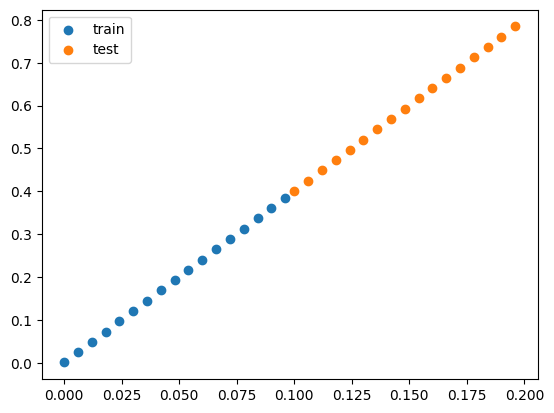

In [75]:
plot_each = 15

plt.scatter(X_train[::plot_each, 0], y_train[::plot_each], label='train')
plt.scatter(X_test[::plot_each, 0], y_test[::plot_each], label='test')
plt.legend();

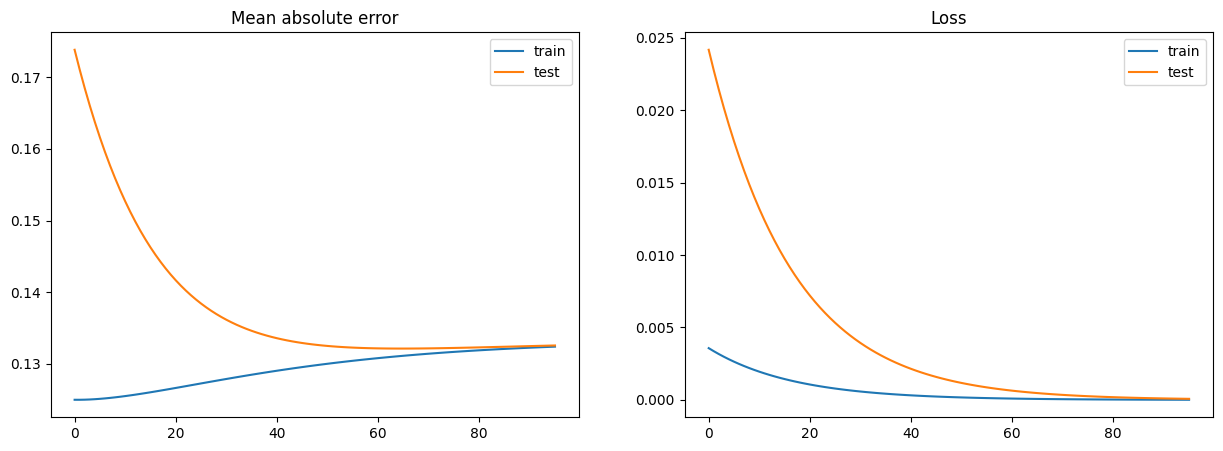

In [76]:
# define neural net
model = NN(MSELoss())

# add some layers
model.add_layer(LinearLayer(4, 1))

model = train(model, X_train, y_train, minibatch_size=10, epoch=100,
           learning_rate=0.01, X_val=X_test, y_val=y_test, verbose=True)

# Задача 5 -- Обучить нейросеть на реальных данных

In [77]:
import pandas as pd

DATA_URL = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(DATA_URL)

In [78]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
cat_columns = ['sex', 'smoker', 'region']
dummy_data = pd.get_dummies(data[cat_columns])
data.drop(cat_columns, axis=1, inplace=True)
data = pd.concat([data, dummy_data], axis=1)

In [80]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


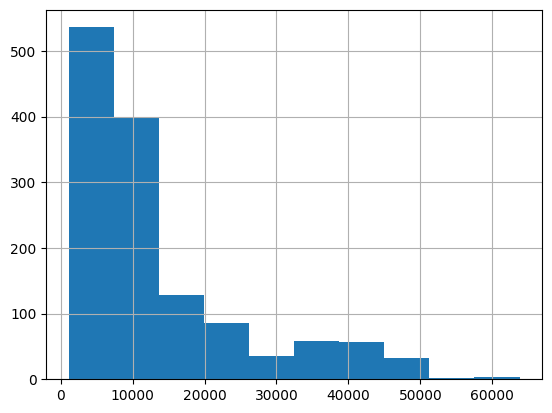

In [81]:
data['charges'].hist();

In [82]:
data['charges_log'] = np.log(data['charges'])

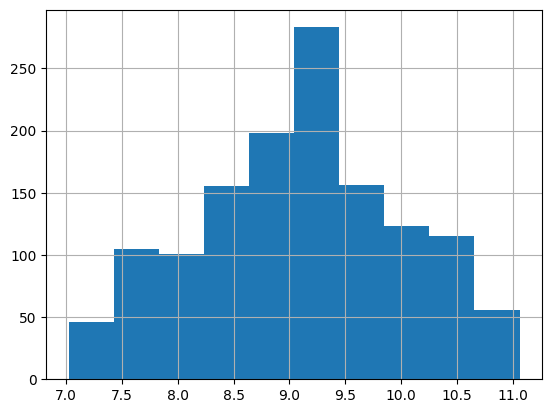

In [83]:
data['charges_log'].hist();

In [84]:
data.drop(['charges'], axis=1, inplace=True)

In [85]:
def standart_scale_feature(feature_array):
    mean = np.mean(feature_array)
    std = np.std(feature_array)
    output = (feature_array - mean) / std
    return output

In [86]:
num_features = ["age", "bmi", "children"]
for feature in num_features:
    data[feature] = standart_scale_feature(data[feature])

In [87]:
data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges_log
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1,9.734176
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0,7.453302
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0,8.400538
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0,9.998092
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0,8.260197


In [88]:
y_name = 'charges_log'
X = data.drop([y_name], axis=1).to_numpy()
y = data[y_name].to_numpy().reshape(-1, 1)

In [89]:
print("X:")
print(X[:5])
print("y:")
print(y[:5])

X:
[[-1.43876426 -0.45332    -0.90861367  1.          0.          0.
   1.          0.          0.          0.          1.        ]
 [-1.50996545  0.5096211  -0.07876719  0.          1.          1.
   0.          0.          0.          1.          0.        ]
 [-0.79795355  0.38330685  1.58092576  0.          1.          1.
   0.          0.          0.          1.          0.        ]
 [-0.4419476  -1.30553108 -0.90861367  0.          1.          1.
   0.          0.          1.          0.          0.        ]
 [-0.51314879 -0.29255641 -0.90861367  0.          1.          1.
   0.          0.          1.          0.          0.        ]]
y:
[[9.73417643]
 [7.45330245]
 [8.40053847]
 [9.9980916 ]
 [8.26019685]]


In [90]:
print(X.shape)

(1338, 11)


In [91]:
split_idx = 1000
X_train = X[:split_idx]
y_train = y[:split_idx]
X_test = X[split_idx:]
y_test = y[split_idx:]

In [92]:
X_train.shape

(1000, 11)

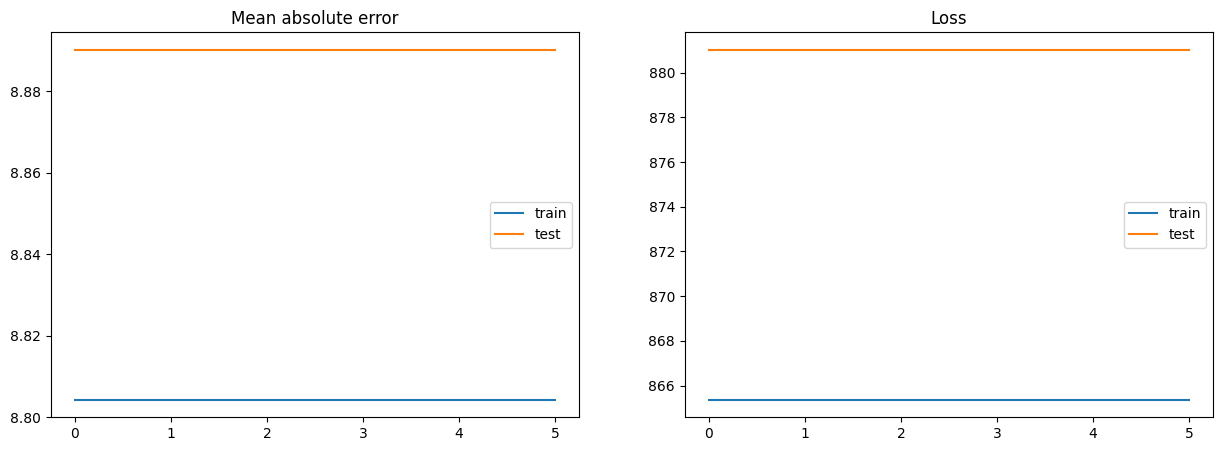

In [94]:
LEARNING_RATE = 1e-3  # с этим параметром придется поиграться
N_EPOCHS = 10  # c этим тоже

# инициализируем нейросеть
model = NN(MSELoss())

# TODO: добавьте слои в сеть

model = train(model, X_train, y_train, minibatch_size=128, epoch=N_EPOCHS,
           learning_rate=LEARNING_RATE, X_val=X_test, y_val=y_test, verbose=True)

In [95]:
y_train_pred = model.predict(X_train)
mean_error_train = np.mean(abs(y_train - y_train_pred))
print(f"Средняя абсолютная ошибка на трейне: {mean_error_train:.3f}")

y_test_pred = model.predict(X_test)
mean_error_test = np.mean(abs(y_test - y_test_pred))
print(f"Средняя абсолютная ошибка на тесте: {mean_error_test:.3f}")

Средняя абсолютная ошибка на трейне: 8.804
Средняя абсолютная ошибка на тесте: 8.890


In [96]:
y_train_pred = model.predict(X_train)
y_train_pred_true_values = np.exp(y_train_pred)
y_train_true_values = np.exp(y_train)
mean_error_train = np.mean(abs(y_train_true_values - y_train_pred_true_values))
print(f"Средняя ошибка на трейне: {mean_error_train:.2f}")

y_test_pred = model.predict(X_test)
y_test_pred_true_values = np.exp(y_test_pred)
y_test_true_values = np.exp(y_test)
mean_error_test = np.mean(abs(y_test_true_values - y_test_pred_true_values))
print(f"Средняя ошибка на тесте: {mean_error_test:.2f}")

Средняя ошибка на трейне: 13074.08
Средняя ошибка на тесте: 13844.70


In [97]:
def mape_count(y_true, y_pred):
    return np.mean((abs(y_true - y_pred) / y_true) * 100)

In [98]:
mape_train = mape_count(y_train_true_values, y_train_pred_true_values)
mape_test = mape_count(y_test_true_values, y_test_pred_true_values)
print(f"MAPE train: {mape_train:.2f}%")
print(f"MAPE test: {mape_test:.2f}%")

MAPE train: 99.97%
MAPE test: 99.97%
